# K-Means clustering on Deeplearning.ai user data

In [1]:
# import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
data = pd.read_csv('data/df_complete.csv') # bring data set into laboratory

print(
    f"# samples: {data.shape[0]}; # features: {data.shape[1]}"
)

# samples: 325025; # features: 39


C:\Users\Hedronstone\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols2drop = [ # specify columns to drop from source array 
 'Unnamed: 0',
 'Contact ID',   
 'Last Activity Date',
 'First Page Seen',
 'Last Page Seen',
 'Opted out of email: Events and Community',
 'Opted out of email: Program Announcements',
 'Opted out of email: The Batch',
 'Unsubscribed from all email',
 'Which of the following online courses have you taken from deeplearning.ai?',
 'Last Registered Event',
 'Last Registered Event Date',
 'Number of event completions',
 'Highest level of completed education',
 'Job Title or Function',
 'IP Country Code',
 'Associated Company ID',]

X = data.drop(columns=cols2drop) # drop columns and store in X

In [4]:
contacts = data['Contact ID'] # pass contact ids to variable "contacts"

countries = dict(zip(X['IP Country'].unique(), list(range(len(X))))) # create dictionary of country encodings 

X['IP Country'] = X['IP Country'].map(countries) # map encodings to X

X = X.iloc[np.where(X['Number of Sessions']!=0)] # drop samples with no pageview history

cols = ['First marketing email click date', 'First marketing email open date',
       'First marketing email send date', 'Last marketing email click date',
       'Last marketing email open date',
       'Last marketing email send date', 'Number of Pageviews', 'Number of Sessions', 'Marketing emails opened',
       'Marketing emails delivered', 'Marketing emails clicked', 'IP Country',
       'url0', 'url1', 'url2', 'url3']

In [5]:
Xd = X[cols[:6]] # dates from original array

for i in range(6): # convert strings to datetime objects 
    Xd[cols[i]] = pd.to_datetime(X[cols[i]].iloc[np.where(X[cols[i]] != 0)], errors='coerce')

C:\Users\Hedronstone\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
# t1 --> "First marketing email open date" - "First marketing email send date"
# t2 --> "First marketing email click date" - "First marketing email open date"
# t3 --> "Last marketing email click date" - "First marketing email click date" (if == 0, user's first opened marketing email was the last marketing email)
# t4 --> "Last marketing email open date" - "Last marketing email send date" (if < 0, user did not open last marketing email but did open 1 or more marketing emails in the past)
# t5 --> "Last marketing email click date" - "Last marketing email open date" (if < 0, user clicked marketing email in past but did not open recent marketing email)
# engagement score -->  [marketing emails clicked * marketing emails opened] / marketing emails delivered
# marketing effort --> [marketing emails delivered / marketing emails opened] * 1 + marketing emails clicked

Xd['t1'] = Xd[cols[1]] - Xd[cols[2]] # "First marketing email open date" - "First marketing email send date" 
Xd['t2'] = Xd[cols[0]] - Xd[cols[1]] # "First marketing email click date" - "First marketing email open date"
Xd['t3'] = Xd[cols[3]] - Xd[cols[0]] # "Last marketing email click date" - "First marketing email click date"
Xd['t4'] = Xd[cols[1]] - Xd[cols[5]] # "Last marketing email open date" - "Last marketing email send date"
Xd['t5'] = Xd[cols[3]] - Xd[cols[4]] # "Last marketing email click date" - "Last marketing email open date"
Xd['engagement score'] = (X[cols[10]] * X[cols[8]]) / X[cols[9]]
Xd['marketing effort'] = (X['Marketing emails delivered'] / X['Marketing emails opened']) * 1+X['Marketing emails clicked']

C:\Users\Hedronstone\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Hedronstone\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Hedronstone\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [7]:
# separate timedelta object values into attributes 'd1' and 'h1'
Xd['d1'] = Xd['t1'].dt.days # days
Xd['h1'] = Xd['t1'].dt.seconds / (3600 * 24)

Xd['d2'] = Xd['t2'].dt.days
Xd['h2'] = Xd['t2'].dt.seconds / (3600 * 24)

Xd['d3'] = Xd['t3'].dt.days
Xd['h3'] = Xd['t3'].dt.seconds / (3600 * 24) 

Xd['d4'] = Xd['t4'].dt.days
Xd['h4'] = Xd['t4'].dt.seconds / (3600 * 24) 

Xd['d5'] = Xd['t5'].dt.days
Xd['h5'] = Xd['t5'].dt.seconds / (3600 * 24)

C:\Users\Hedronstone\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hedronstone\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hedronstone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [8]:
COLS = ['Marketing emails clicked', 'Marketing emails opened', 'Marketing emails delivered']
Xd['marketing emails clicked'] = X[COLS[0]]
Xd['marketing emails opened'] = X[COLS[1]]
Xd['marketing emails delivered'] = X[COLS[2]]

new_arrangement = ['d1', 'h1', 
                   'd2', 'h2', 
                   'd3', 'h3',
                   'd4', 'h4',
                   'd5', 'h5',
                   'marketing emails clicked',
                   'marketing emails opened',
                   'marketing emails delivered',
                   'marketing effort',
                  'engagement score']

# get absolute values from array
df = Xd[new_arrangement].fillna(0).abs()
# replace inf values with zeros
df = df.replace([np.inf, -np.inf], 0)

# create feature 'days2click'
df['∑ time'] = 0

for i in range(len(df)):
    df['∑ time'].iloc[i] = np.sum(df.values[i][:9]) / 5

# sanity check
df

C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,d1,h1,d2,h2,d3,h3,d4,h4,d5,h5,marketing emails clicked,marketing emails opened,marketing emails delivered,marketing effort,engagement score,∑ time
5,0.0,0.012500,36.0,0.423611,0.0,0.000000,261.0,0.893750,156.0,0.548611,1.0,12.0,42.0,4.500000,0.285714,90.865972
15,42.0,0.095833,0.0,0.544444,456.0,0.151389,462.0,0.025694,7.0,0.148611,18.0,48.0,85.0,19.770833,10.164706,193.563472
24,0.0,0.001389,0.0,0.002778,471.0,0.386111,505.0,0.927083,33.0,0.137500,3.0,35.0,85.0,5.428571,1.235294,202.063472
36,4.0,0.664583,121.0,0.210417,0.0,0.000000,122.0,0.790278,0.0,0.000000,1.0,6.0,20.0,4.333333,0.300000,49.733056
62,54.0,0.625694,0.0,0.000000,0.0,0.000000,133.0,0.067361,0.0,0.000000,0.0,5.0,32.0,6.400000,0.000000,37.538611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325012,0.0,0.000694,0.0,0.000000,0.0,0.000000,44.0,0.645833,45.0,0.936806,1.0,2.0,11.0,6.500000,0.181818,17.929306
325013,15.0,0.762500,0.0,0.000000,0.0,0.000000,28.0,0.465972,0.0,0.000000,0.0,2.0,8.0,4.000000,0.000000,8.845694
325018,21.0,0.856250,0.0,0.000000,0.0,0.000000,0.0,0.815278,0.0,0.000000,0.0,1.0,2.0,2.000000,0.000000,4.534306
325020,0.0,0.000694,0.0,0.000000,0.0,0.000000,44.0,0.856944,0.0,0.000000,0.0,1.0,8.0,8.000000,0.000000,8.971528


C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hedronstone\Anaconda3\lib\site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209AB157D08>,
      dtype=object)

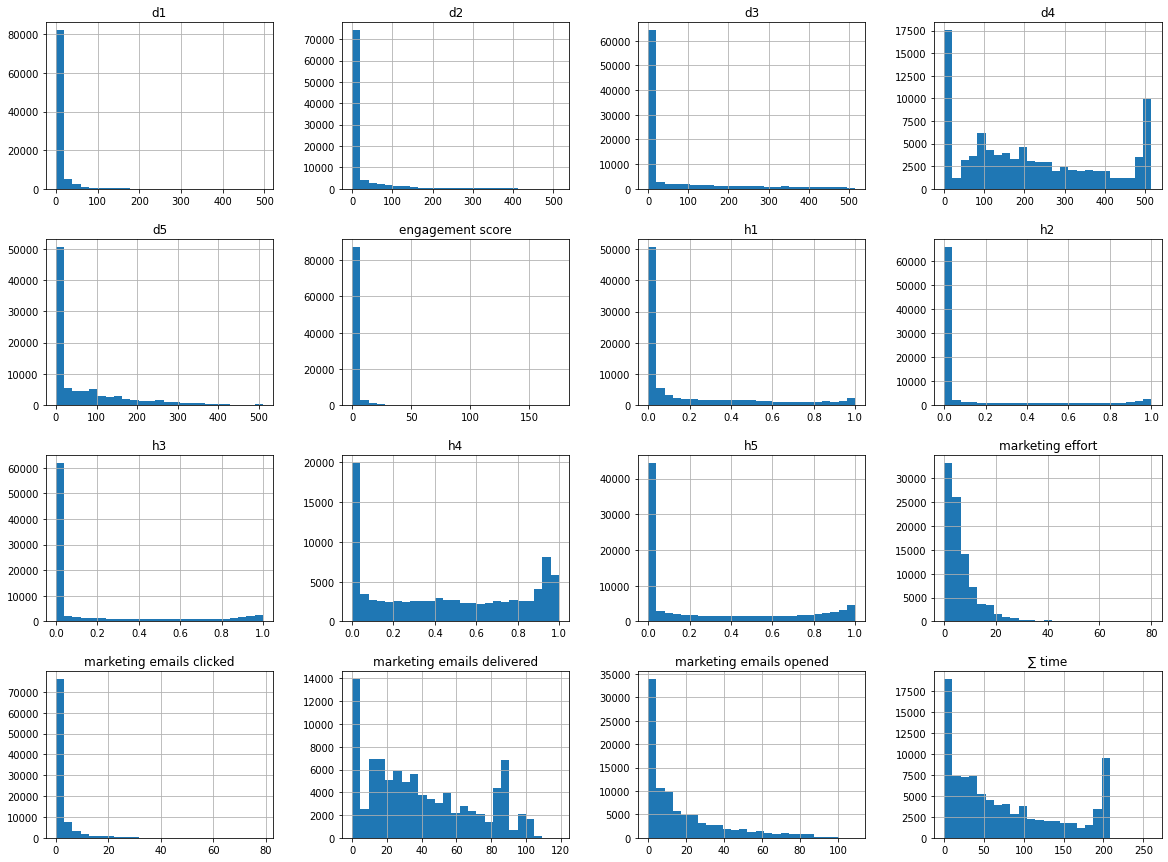

In [9]:
%matplotlib inline
df.hist(bins=25, figsize=(20,15))

C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hedronstone\Anaconda3\lib\site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209AE987848>,
      dtype=object)

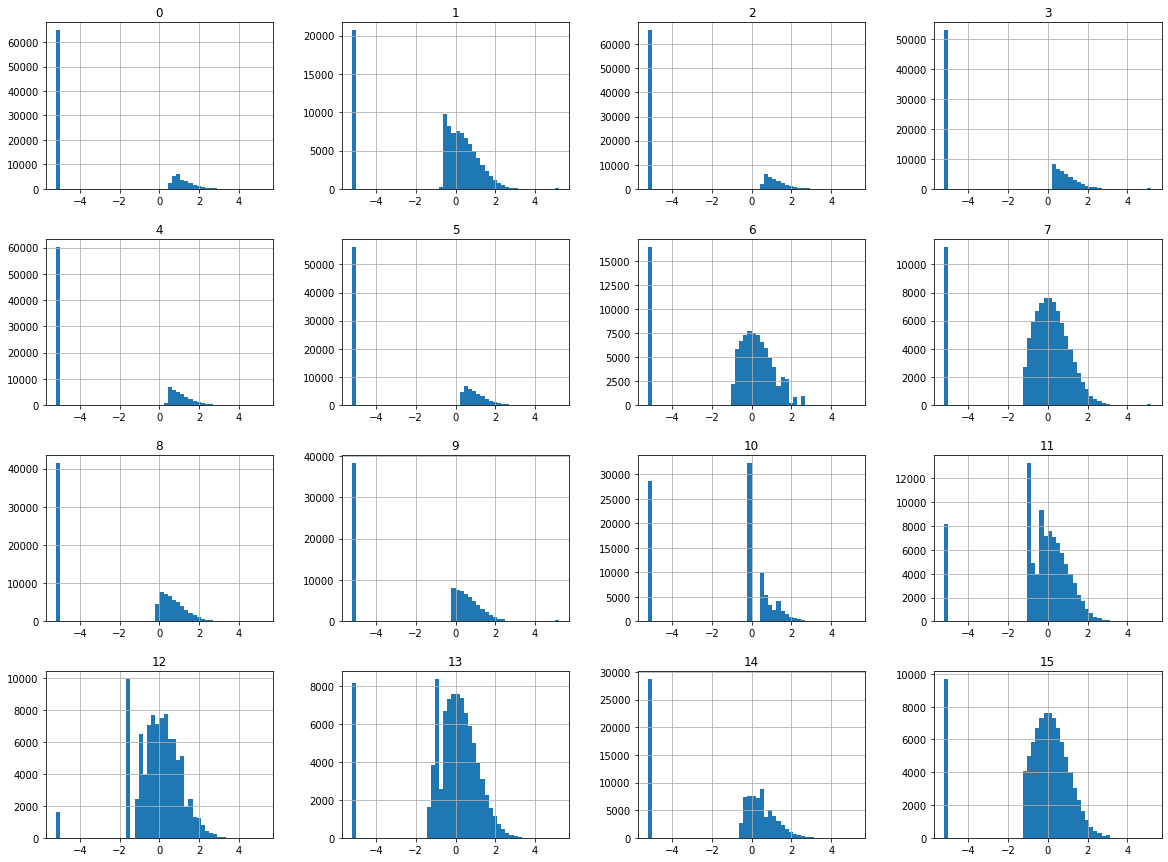

In [10]:
# quantile transform 
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=42, output_distribution='normal')
X_quantized = pd.DataFrame(qt.fit_transform(df))
X_quantized.hist(bins=50, figsize=(20,15))

C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hedronstone\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hedronstone\Anaconda3\lib\site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209B3133E08>,
      dtype=object)

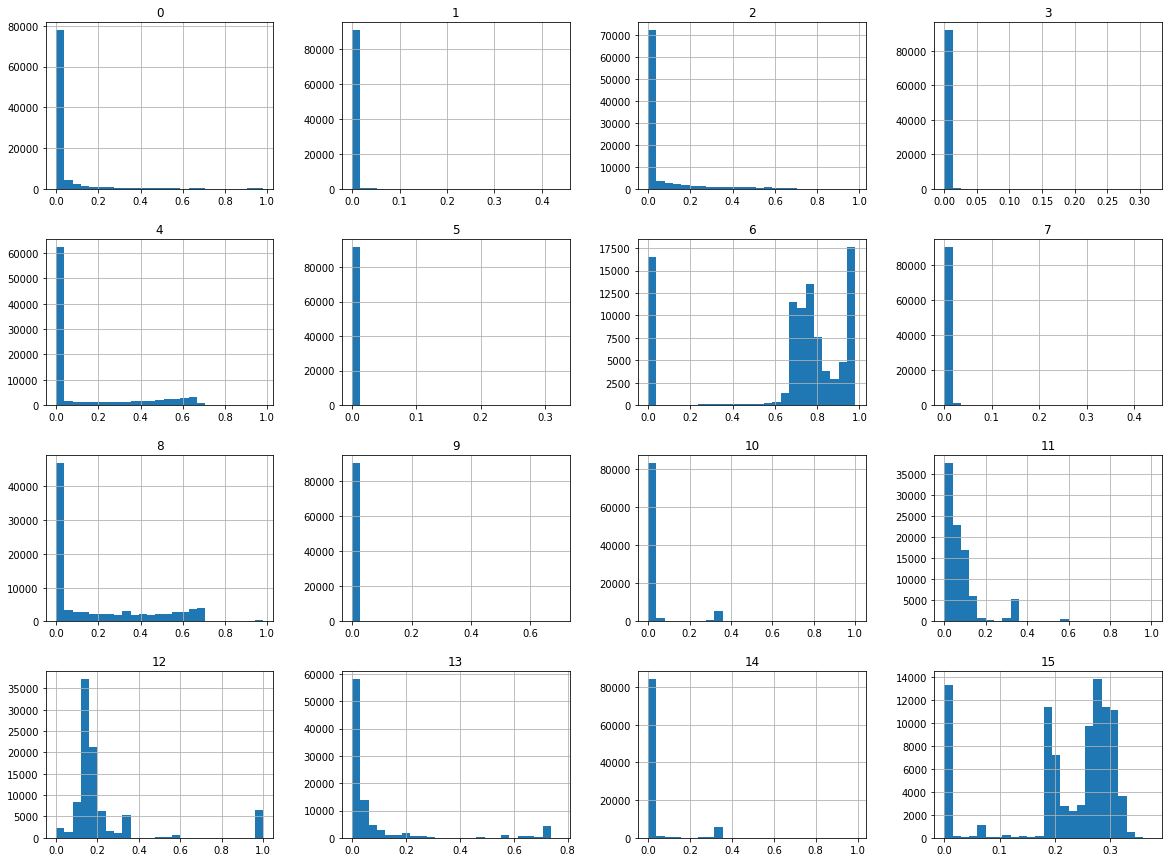

In [11]:
# normalization 
from sklearn.preprocessing import normalize
X_normalized = pd.DataFrame(normalize(df, norm='l2'))
X_normalized.hist(bins=25, figsize=(20,15))

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
X_standardized = pd.DataFrame(scaler.transform(df))
X_standardized.hist(bins=25, figsize=(20,15))

# Clustering

### We begin with no knowledge of the ground truth classes. 
Therefore, evaluation must be performed using the model itself. That's where the Silhouette Coefficient comes in handy, where a higher Silhouette Coefficient score relates to a model with better defined clusters.

From our "elbow" analysis, we see that the recommeneded number of clusters is 4. Now, let's complete 
our analyis using the Silhouette Coefficient score. 

In [12]:
# identify optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# set X_scaled to preprocessed data
X_scaled = X_quantized 

# use k-clusters from KElbowVisualizer
clusters = KMeans(n_clusters=9, random_state=42)

# get cluster assignments
c_vals = np.array(clusters.fit_predict(X_scaled))

# get unique cluster labels
labs = np.unique(c_vals)

In [13]:
# dimensionality reduction
from sklearn.decomposition import TruncatedSVD

np.random.seed(42)
#Reducing the data to 2 dimensions to improve computation and visualization
clf = TruncatedSVD(2)
pca_df = np.array(clf.fit_transform(X_scaled))
labels=np.array(c_vals)
label_vals=np.array(labs)
print('Reduced data samples: =', pca_df.shape)

Reduced data samples: = (92417, 2)


For n_clusters = 2 The average silhouette_score is : 0.5743294025907988
For n_clusters = 3 The average silhouette_score is : 0.5193759920545553
For n_clusters = 4 The average silhouette_score is : 0.5293111316940499
For n_clusters = 5 The average silhouette_score is : 0.517565317259354
For n_clusters = 6 The average silhouette_score is : 0.525435856975651
For n_clusters = 7 The average silhouette_score is : 0.5599822156701195
For n_clusters = 8 The average silhouette_score is : 0.5904177607102037
For n_clusters = 9 The average silhouette_score is : 0.6283665072276616


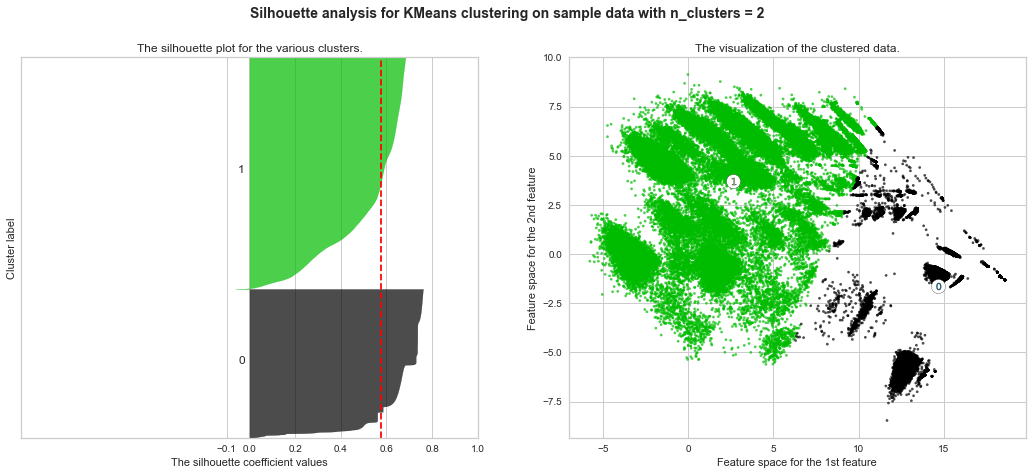

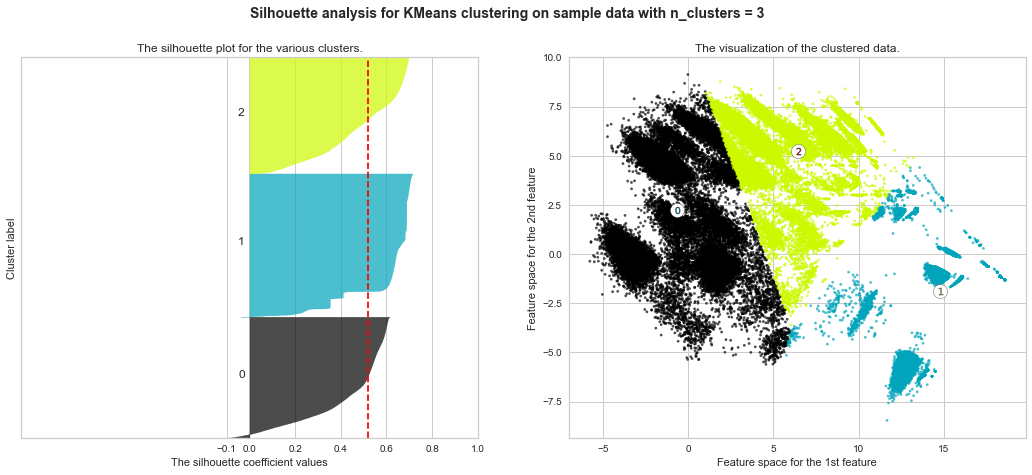

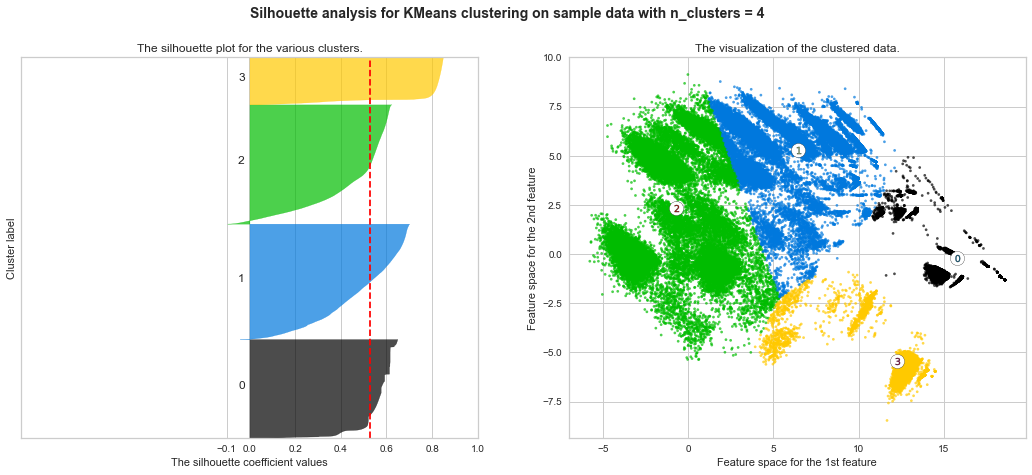

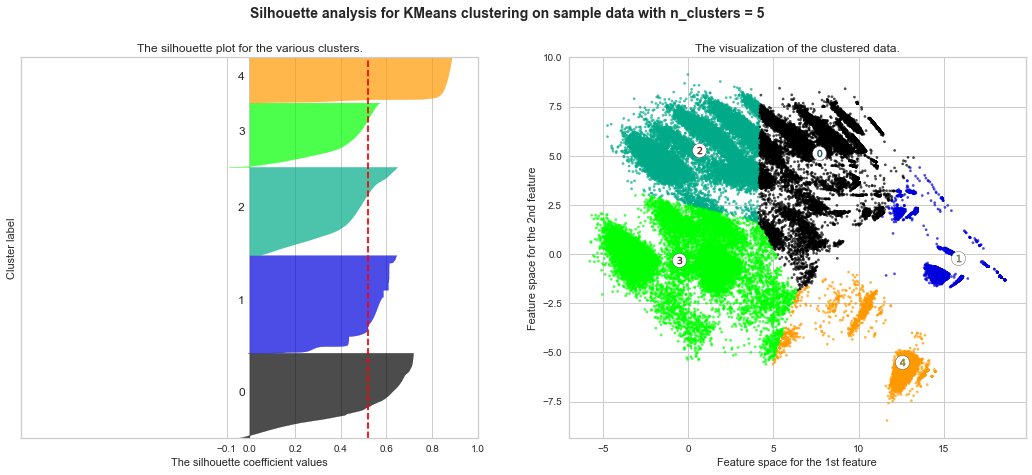

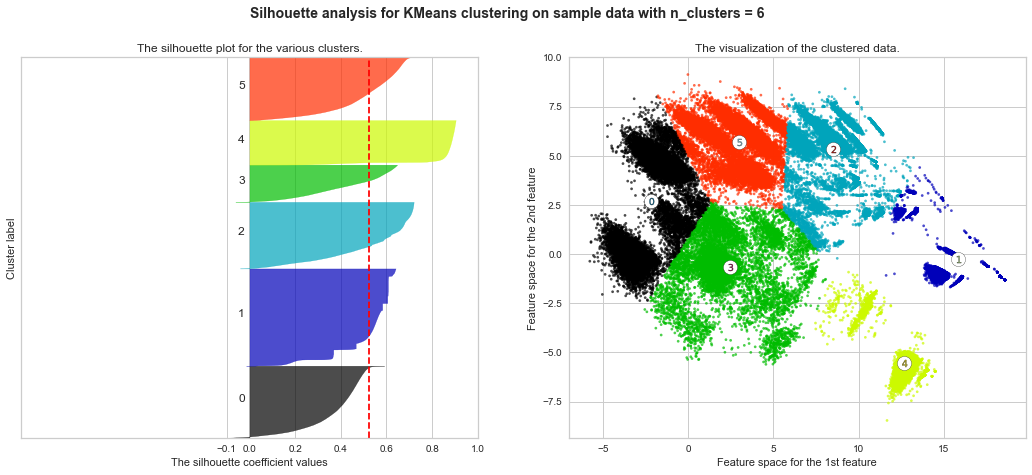

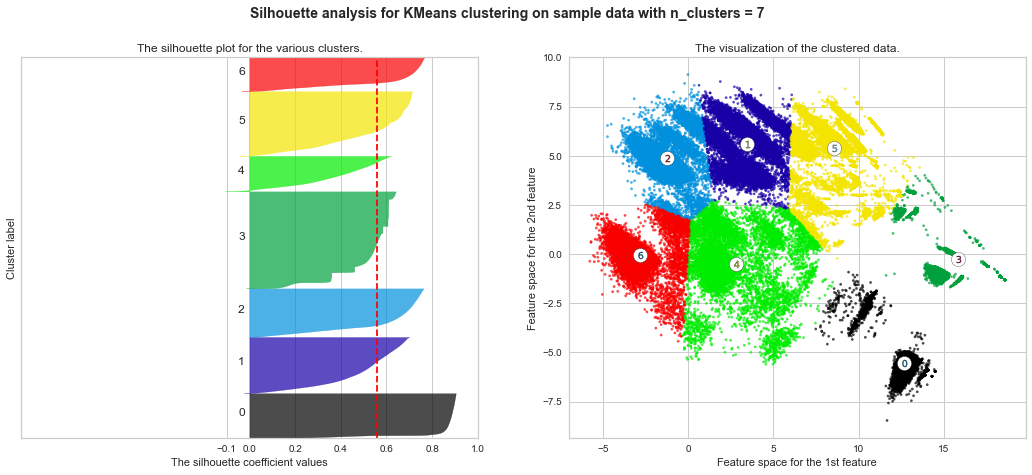

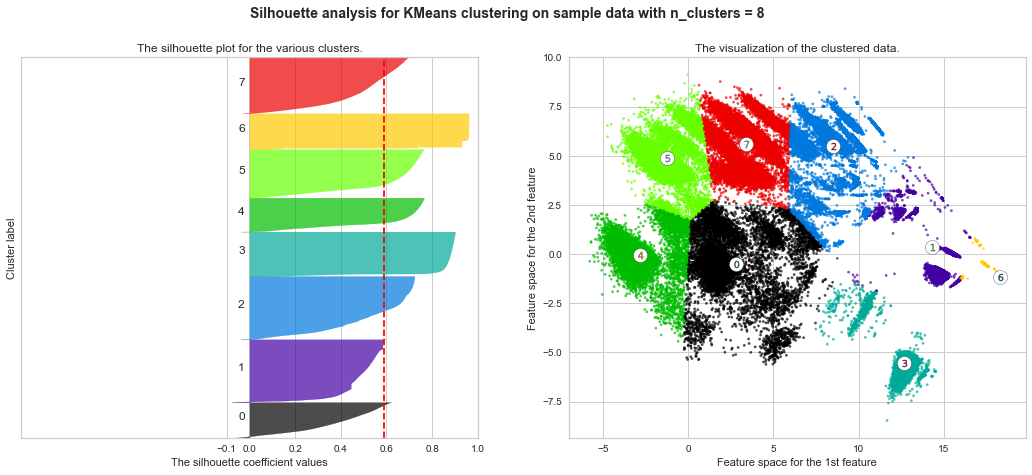

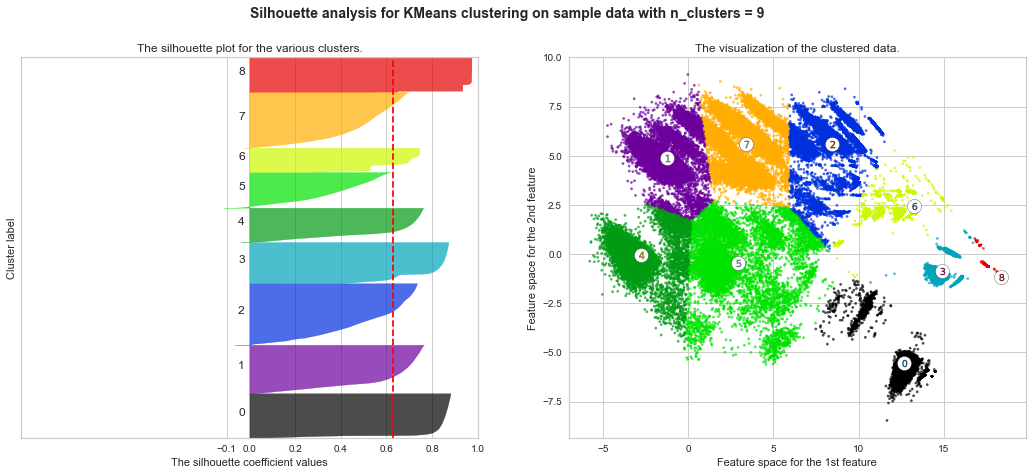

In [14]:
from utils import silscore_pipe
num_clusters = 10
silscore_pipe(pca_df, num_clusters)

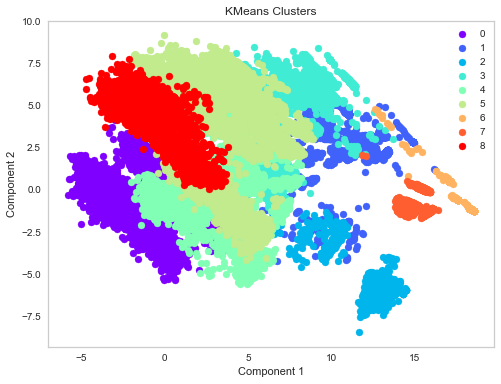

In [15]:
#Now create a function to visualize reduced dimension data

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from utils import visualize_data

# visualize data
visualize_data(pca_df, c_vals, labs, 'KMeans Clusters')

In [16]:
import json
c_vals = np.array(list(map(str, c_vals[:900].tolist()))) # change from int. to string
D = - sklearn.metrics.pairwise.euclidean_distances(pca_df[:900]) # pairwise euclidean distance

mat = {
    "labs": c_vals.tolist(),
    "dists": D.tolist(),
}

# dump jSON to cwd
with open('data.json', 'w') as outfile:
    json.dump(mat, outfile)

NameError: name 'sklearn' is not defined

### Evaluation benchmark 
Our evaluation function, bench_k_means, compares different initialization methods. It is a pipeline which scales the data using a non-parametric transformation to map the data to a uniform ditribution with values between 0 and 1, trains and times the pipeline fitting, and measures the performance of clustering obtained via different metrics.

In [ ]:
from sklearn.decomposition import PCA 
from utils import bench_k_means

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=9, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=pca_df, labels=c_vals)

kmeans = KMeans(init="random", n_clusters=9, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=pca_df, labels=c_vals)
print(82 * '_')

### Visualize results on PCA-reduced data

In [ ]:
import matplotlib.pyplot as plt

kmeans.fit(pca_df) 

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = pca_df[:,0].min() - 1, pca_df[:,0].max() + 1
y_min, y_max = pca_df[:, 1].min() - 1, pca_df[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(pca_df[:, 0], pca_df[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on DL.ai marketing data (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### Cluster characteristics

In [ ]:
df['cluster'] = c_vals
cero = df.iloc[np.where(df['cluster']==0)]
uno = df.iloc[np.where(df['cluster']==1)]
dos = df.iloc[np.where(df['cluster']==2)]
tres = df.iloc[np.where(df['cluster']==3)]
quatro = df.iloc[np.where(df['cluster']==4)] 
cinco = df.iloc[np.where(df['cluster']==5)]
seis = df.iloc[np.where(df['cluster']==6)]
siete = df.iloc[np.where(df['cluster']==7)]
ocho = df.iloc[np.where(df['cluster']==8)]

In [ ]:
means = pd.DataFrame([])
means['c0_mean'] = cero.describe().iloc[1,10:]
means['c1_mean'] = uno.describe().iloc[1,10:]
means['c2_mean'] = dos.describe().iloc[1,10:]
means['c3_mean'] = tres.describe().iloc[1,10:]
means['c4_mean'] = quatro.describe().iloc[1,10:]
means['c5_mean'] = cinco.describe().iloc[1,10:]
means['c6_mean'] = seis.describe().iloc[1,10:]
means['c7_mean'] = siete.describe().iloc[1,10:]
means['c8_mean'] = ocho.describe().iloc[1,10:]
means = means.T

In [ ]:
# move last column to first position
cols = list(means.columns)
cols = [cols[-1]] + cols[:-1]
means = means[cols]
# save to csv
means.to_csv('data/cluster_means.csv', index=False)

In [ ]:
pd.read_csv('data/cluster_means.csv')